# U.S. Medical Insurance Costs

In [2]:
#import libraries
import csv
import math
from statistics import median
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#create empty lists to load insurance.csv column by column
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [4]:
#create a function to open and load data into respective lists
def load_lst(lst, csv_file, column_name):
    with open(csv_file) as csv_data:
        csv_dict = csv.DictReader(csv_data)
        for row in csv_dict:
            lst.append(row[column_name])
        return lst

In [5]:
#call function to load lists
load_lst(ages, 'insurance.csv', 'age')
load_lst(sexes, 'insurance.csv', 'sex')
load_lst(bmis, 'insurance.csv', 'bmi')
load_lst(num_children, 'insurance.csv', 'children')
load_lst(smoker_statuses, 'insurance.csv', 'smoker')
load_lst(regions, 'insurance.csv', 'region')
load_lst(insurance_charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

In [6]:
#create a dictionary of all medical insurance data where insurance charges are the keys
medical_data = {}
num_of_med_data = len(insurance_charges)

def create_dictionary(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges):
    for i in range(num_of_med_data):
        medical_data[insurance_charges[i]] = {'Age': ages[i], 'Sex': sexes[i], 'BMI': bmis[i], 'Children': num_children[i], 'Smoker': smoker_statuses[i], 'Region': regions[i], 'Insurance Charge': insurance_charges[i]}
    return medical_data

medical_data = create_dictionary(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)
#print(medical_data)
print(medical_data[insurance_charges[2]])

{'Age': '28', 'Sex': 'male', 'BMI': '33', 'Children': '3', 'Smoker': 'no', 'Region': 'southeast', 'Insurance Charge': '4449.462'}


In [7]:
#find the total number of persons whose insurance data is recorded in insurance.csv/medical_data
total_persons = len(medical_data) + 1
print("We have a complete insurance data of {} persons in the US Medical Insurance Costs dataset.".format(total_persons))
print(range(total_persons))

We have a complete insurance data of 1338 persons in the US Medical Insurance Costs dataset.
range(0, 1338)


In [8]:
#find the mean of the ages 
ages_total = 0
for age in ages:
    ages_total += int(age)

average_age = ages_total/len(ages)
print("Average age of patients: {}years old.".format(math.floor(average_age)))

Average age of patients: 39years old.


In [9]:
#find the median of the ages 
sorted_ages = sorted(ages)
#print(sorted_ages)

def getMedian(lst):
    if len(sorted_ages) % 2 == 1:
        return int(sorted_ages[len(sorted_ages)//2])
    else:
        median_lower = int(sorted_ages[len(sorted_ages)//2 - 1])
        median_upper = int(sorted_ages[len(sorted_ages)//2])
        median_ages = (median_lower + median_upper) / 2
        return median_ages
median_ages = getMedian(sorted_ages)
print("The median age of the patients is {}years old.".format(int(median_ages)))    


#check answer
#print(int(sorted_ages[668]))
#print(int(sorted_ages[669]))



The median age of the patients is 39years old.


In [10]:
#find the mean of the bmis 
bmis_total = 0
for bmi in bmis:
    bmis_total += float(bmi)

average_bmi = bmis_total/len(bmis)
print("Average BMI of the patients: {}.".format(round(average_bmi, 2)))

Average BMI of the patients: 30.66.


In [11]:
#find the median of the bmis 
sorted_bmis = sorted(bmis)
#print(sorted_bmis)

def getMedian(lst):
    if len(sorted_bmis) % 2 == 1:
        return sorted_bmis[len(sorted_bmis)//2]
    else:
        median_lower = float(sorted_bmis[len(sorted_bmis)//2 - 1])
        median_upper = float(sorted_bmis[len(sorted_bmis)//2])
        median_bmis = (median_lower + median_upper) / 2
        return median_bmis
median_bmis = getMedian(sorted_bmis)
print("The median BMI of the patients is {}.".format(median_bmis))

The median BMI of the patients is 30.4.


In [12]:
#find the mean of insurance charges 
total_insurance_charges = 0
for charge in insurance_charges:
    total_insurance_charges += float(charge)

average_insurance_charges = total_insurance_charges/len(insurance_charges)
print("Average Insurance Charge: ${}.". format(round(average_insurance_charges, 2)))

Average Insurance Charge: $13270.42.


In [13]:
#find the median of insurance charges 
sorted_insurance_charges = sorted(insurance_charges)
#print(sorted_insurance_charges)

def getMedian(lst):
    if len(sorted_insurance_charges) % 2 == 1:
        return sorted_insurance_charges[len(sorted_insurance_charges)//2]
    else:
        median_lower = float(sorted_insurance_charges[len(sorted_insurance_charges)//2 - 1])
        median_upper = float(sorted_insurance_charges[len(sorted_insurance_charges)//2])
        median_insurance_charges = (median_lower + median_upper) / 2
        return median_insurance_charges
median_insurance_charges = getMedian(sorted_insurance_charges)
print("The median Insurance Charge is ${}.".format(round(median_insurance_charges, 2)))   


The median Insurance Charge is $17390.73.


In [14]:
#count the number of smokers
def count(smokers):
    total_smokers = 0
    for i in smoker_statuses:
        if i == 'yes':
            total_smokers += 1
    return total_smokers

num_smokers = count(smoker_statuses)
print("{} of {} are smokers.".format(num_smokers, total_persons))

274 of 1338 are smokers.


In [15]:
#check to see if non-smokers = 1338 - 274
def count(smokers):
    total_non_smokers = 0
    for i in smoker_statuses:
        if i == 'no':
            total_non_smokers += 1
    return total_non_smokers

num_non_smokers = count(smoker_statuses)
print("{} of {} are non-smokers.".format(num_non_smokers, total_persons))

1064 of 1338 are non-smokers.


In [16]:
#calculate the proportion of smokers and non-smokers
print('About {}% of patients in this dataset are smokers'.format(round((num_smokers/total_persons) * 100), 2))
print('About {}% of patients in this dataset are non-smokers'.format(round((num_non_smokers/total_persons) * 100), 2))

About 20% of patients in this dataset are smokers
About 80% of patients in this dataset are non-smokers


In [17]:
#################################Working with pandas DataFrames####################################################

In [18]:
#create a table showing all the attributes as columns by reading the insurance.csv file
medical_df = pd.read_csv('insurance.csv')
print(medical_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [19]:
#create a separate table for patients who are smokers to start to inspect how a patient's smoker status may or may not have impacted their insurance charge
smokers_patients = medical_df[(medical_df.smoker == 'yes')]
print(smokers_patients)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]


In [20]:
#create a separate table for patients who are non-smokers
non_smokers_patients = medical_df[(medical_df.smoker == 'no')]
print(non_smokers_patients)

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


In [21]:
#consider other attributes as well
#calculate min, max, and range of patients' ages
max_age = medical_df.age.max()
print("The oldest patient is {} years old".format(max_age))
min_age = medical_df.age.min()
print("The youngest patient is {} years old".format(min_age))
range_age = max_age - min_age
print("Range of ages of patients in this dataset: {} years".format(range_age))

The oldest patient is 64 years old
The youngest patient is 18 years old
Range of ages of patients in this dataset: 46 years


In [22]:
#calculate min, max, and range of patients' charges
max_charge = medical_df.charges.max()
print("The highest amount charged to at least one patient in this dataset is approximately ${}".format(round(max_charge, 2)))
min_charge = medical_df.charges.min()
print("The lowest amount charged to at least one patient in this dataset is approximately ${}".format(round(min_charge, 2)))
range_charge = max_charge - min_charge
print("Range of insurance charges is approximately ${}".format(round(range_charge, 2)))

The highest amount charged to at least one patient in this dataset is approximately $63770.43
The lowest amount charged to at least one patient in this dataset is approximately $1121.87
Range of insurance charges is approximately $62648.55


In [23]:
#print out and inspect data of high-paying patients to further inspect the potential impact of all other attributes on the charges 
high_paying_patients = medical_df[medical_df.charges > 50000]
print(high_paying_patients)

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309


In [24]:
#compare with the data of less-paying patients
low_paying_patients = medical_df[medical_df.charges < 1500]
print(low_paying_patients)

      age   sex    bmi  children smoker     region    charges
22     18  male  34.10         0     no  southeast  1137.0110
136    19  male  34.10         0     no  southwest  1261.4420
194    18  male  34.43         0     no  southeast  1137.4697
374    20  male  33.33         0     no  southeast  1391.5287
385    19  male  34.40         0     no  southwest  1261.8590
442    18  male  43.01         0     no  southeast  1149.3959
487    19  male  28.70         0     no  southwest  1253.9360
513    19  male  30.40         0     no  southwest  1256.2990
584    19  male  20.70         0     no  southwest  1242.8160
663    18  male  33.66         0     no  southeast  1136.3994
681    19  male  20.30         0     no  southwest  1242.2600
723    19  male  35.40         0     no  southwest  1263.2490
781    18  male  41.14         0     no  southeast  1146.7966
791    19  male  27.60         0     no  southwest  1252.4070
808    18  male  30.14         0     no  southeast  1131.5066
866    1

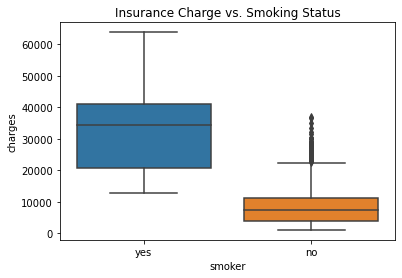

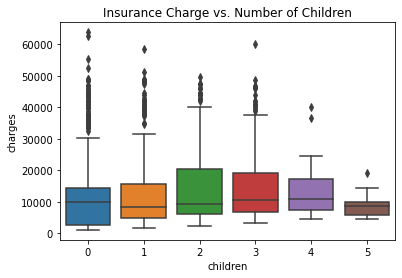

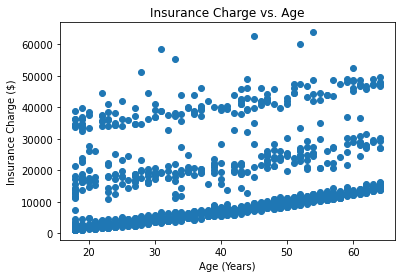

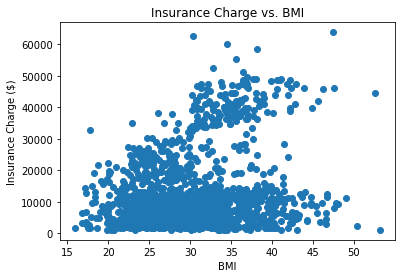

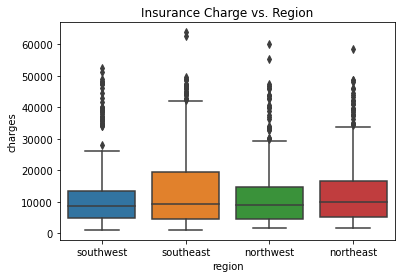

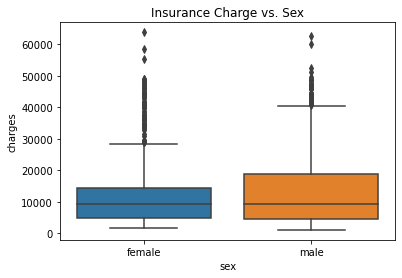

In [26]:
#visualize how different attributes may or may not have been influential towards the insurance charge
#smoker(yes or no)
sns.boxplot(data = medical_df, x = 'smoker', y = 'charges')
plt.title('Insurance Charge vs. Smoking Status')
plt.show()

#number of children
sns.boxplot(data = medical_df, x = 'children', y = 'charges')
plt.title('Insurance Charge vs. Number of Children')
plt.show()


#age
plt.scatter(x = medical_df.age, y = medical_df.charges)
plt.xlabel('Age (Years)')
plt.ylabel('Insurance Charge ($)')
plt.title('Insurance Charge vs. Age')
plt.show()

#BMI
plt.scatter(x = medical_df.bmi, y = medical_df.charges)
plt.xlabel('BMI')
plt.ylabel('Insurance Charge ($)')
plt.title('Insurance Charge vs. BMI')
plt.show()

#region
sns.boxplot(data = medical_df, x = 'region', y = 'charges')
plt.title('Insurance Charge vs. Region')
plt.show()

#sex
sns.boxplot(data = medical_df, x = 'sex', y = 'charges')
plt.title('Insurance Charge vs. Sex')
plt.show()

In [27]:
#calculate pearson correlation to check the strength of the linear relationship between insurance charges and the other quantitative variables(number of children , age, and bmi)
#number of children
corr_children_charges, p = pearsonr(medical_df.children, medical_df.charges)
print("The correlation coefficient of {} indicates a linear association between the number of children a patient has and the insurance payment charged to them.".format(round(corr_children_charges, 1)))

#age
corr_age_charges, p = pearsonr(medical_df.age, medical_df.charges)
print("The correlation coefficient of {} indicates a linear association between a patient's age and the insurance payment charged to them.".format(round(corr_age_charges, 1)))

#BMI
corr_bmi_charges, p = pearsonr(medical_df.bmi, medical_df.charges)
print("The correlation coefficient of {} indicates a linear association between a patient's BMI and the insurance payment charged to them.".format(round(corr_bmi_charges, 1)))

The correlation coefficient of 0.1 indicates a linear association between the number of children a patient has and the insurance payment charged to them.
The correlation coefficient of 0.3 indicates a linear association between a patient's age and the insurance payment charged to them.
The correlation coefficient of 0.2 indicates a linear association between a patient's BMI and the insurance payment charged to them.


In [28]:
###Using Python Classes to create a system that makes it easier to organize patients' data

In [29]:
#build a constructor and other functional methods 
class Patient:
  def __init__(self, name, age, sex, bmi, num_of_children, smoker):
    self.name = name
    self.age = age
    self.sex = sex
    self.bmi = bmi
    self.num_of_children = num_of_children
    self.smoker = smoker

  def estimated_insurance_cost(self):
    estimated_cost = 250*self.age - 128*self.sex + 370*self.bmi + 425*self.num_of_children + 24000*self.smoker - 12500
    print(self.name + "'s estimated insurance cost is " + str(estimated_cost) + " dollars")
    
  def update_age(self, new_age):
    self.age = new_age
    print(self.name + " is now "+ str(self.age) + " years old.")
    self.estimated_insurance_cost()

  def update_num_children(self, new_num_children):
    self.num_of_children = new_num_children
    if self.num_of_children == 1:
      print(self.name + " has " + str(self.num_of_children) + " child.")
    else:
      print(self.name + " has " + str(self.num_of_children) + " children.")
    self.estimated_insurance_cost()

  def update_bmi(self, new_bmi):
    self.bmi = new_bmi
    print(self.name + "'s BMI is now " + str(self.bmi))
    self.estimated_insurance_cost()

  def update_smoking_status(self, new_smoking_status):
    self.smoker = new_smoking_status
    if self.smoker == 1:
      print(self.name + " is a smoker.")
    else:
      print(self.name + " is not a smoker.")
    self.estimated_insurance_cost()

  def patient_profile(self):
    patient_information = {}
    patient_information['Name'] = self.name
    patient_information['Age'] = self.age
    patient_information['Sex'] = self.sex
    patient_information['BMI'] = self.bmi
    patient_information['Number of Children'] = self.num_of_children
    patient_information['Smoker'] = self.smoker
    return patient_information


In [30]:
#creating an instance variable
patient1 = Patient('John Doe', 25, 1, 22.2, 0, 0)

#testing out methods
print(patient1.name)
print(patient1.sex)
print(patient1.smoker)
patient1.estimated_insurance_cost()
patient1.update_age(26)
patient1.update_num_children(1)
patient1.update_bmi(24.1)
patient1.update_bmi(20)
patient1.update_smoking_status(1)
print(patient1.patient_profile())

John Doe
1
0
John Doe's estimated insurance cost is 1836.0 dollars
John Doe is now 26 years old.
John Doe's estimated insurance cost is 2086.0 dollars
John Doe has 1 child.
John Doe's estimated insurance cost is 2511.0 dollars
John Doe's BMI is now 24.1
John Doe's estimated insurance cost is 3214.0 dollars
John Doe's BMI is now 20
John Doe's estimated insurance cost is 1697 dollars
John Doe is a smoker.
John Doe's estimated insurance cost is 25697 dollars
{'Name': 'John Doe', 'Age': 26, 'Sex': 1, 'BMI': 20, 'Number of Children': 1, 'Smoker': 1}
